## The purpose of this notebook is to see if we can cluster the features


In [1]:
%matplotlib inline
import itertools

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Import the data and extract the correct columns 

In [2]:
df = pd.read_csv('round1_size22.csv')
master_data = df.as_matrix()

training_synapses = master_data[:, 3]
training_non_synapses = master_data[:, 7]
train_syn = training_synapses[:, np.newaxis]
train_non_syn = training_non_synapses[:, np.newaxis]

### The final training set:
train_data = np.vstack((train_syn, train_non_syn))

### The final label generation, synapses belong to class 1, non-synpases belong to class 0:
train_labels = np.append(np.ones((len(train_syn))), np.zeros(len(train_non_syn)))


### Plot the data to see how many clusters possible:
Note we have 1D data so the y-axis is artifically defined as 1 for ease plotting

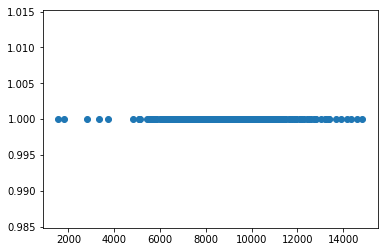

In [3]:
plt.scatter(train_data,len(train_data)*[1])

In [4]:
from sklearn.cluster import KMeans

klist = []
slist = []

for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters=n_clusters,n_init=100,init='k-means++')
    kmeans.fit(train_data)
    C, L = kmeans.cluster_centers_, kmeans.labels_
    print (n_clusters, kmeans.inertia_, kmeans.score(train_data))
    klist.append(n_clusters)
    slist.append(kmeans.inertia_)
    
   

1 2137968717.4020433 -2137968717.402039
2 588094772.6909877 -588094772.6909875
3 369836898.2869297 -369836898.2869298
4 239637325.96501443 -239637325.9650166
5 161624323.4303302 -161624323.43033192
6 110302297.93147728 -110302297.93147904
7 82085216.42398559 -82085216.4239847
8 62547919.75119056 -62547919.751191266
9 50983390.21958463 -50983390.21958131


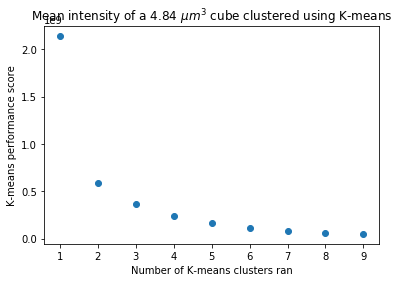

In [5]:
plt.scatter(klist,slist);## to see how many clusters work
plt.xlabel('Number of K-means clusters ran')
plt.ylabel('K-means performance score')

plt.title('Mean intensity of a 4.84 ${\mu}m^3$ cube clustered using K-means')
plt.show()

### In the above plot, we notice that K-means performs well with 2 clusters

In [16]:
## want labels from running Knn for 2 clusters, so run k-means for 2 clusters again:

kmeans = KMeans(n_clusters=2,n_init=100,init='k-means++')
kmeans.fit(train_data)
C, L = kmeans.cluster_centers_, kmeans.labels_
print(L)## to see which class the data points belong to, heer we observe that synapses are class zero
print(L.shape)

[1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 

In [7]:
C

array([[10673.12779541],
       [ 7490.36311377]])

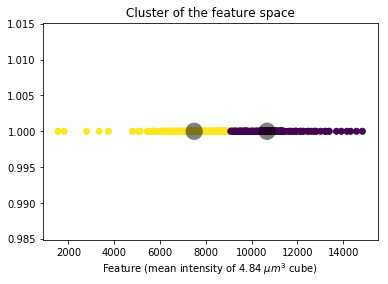

In [8]:
plt.scatter(train_data,len(train_data)*[1], c = L) ##to see which points belong to which clusters
plt.scatter(C,len(C)*[1],c = 'k',marker='o',s=300,alpha=0.5,edgecolor='none')
plt.xlabel('Feature (mean intensity of 4.84 ${\mu}m^3$ cube)')


plt.title('Cluster of the feature space')
plt.show()

## Try the same thing but for 1 micron cube

In [9]:
## The usual to get the data:

df = pd.read_csv('round1_size10.csv')
master_data = df.as_matrix()

training_synapses = master_data[:, 3]
training_non_synapses = master_data[:, 7]
train_syn = training_synapses[:, np.newaxis]
train_non_syn = training_non_synapses[:, np.newaxis]

### The final training set:
train_data = np.vstack((train_syn, train_non_syn))

### The final label generation, synapses belong to class 1, non-synpases belong to class 0:
train_labels = np.append(np.ones((len(train_syn))), np.zeros(len(train_non_syn)))


In [10]:
from sklearn.cluster import KMeans

klist = []
slist = []

for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters=n_clusters,n_init=100,init='k-means++')
    kmeans.fit(train_data)
    C, L = kmeans.cluster_centers_, kmeans.labels_
    print (n_clusters, kmeans.inertia_, kmeans.score(train_data))
    klist.append(n_clusters)
    slist.append(kmeans.inertia_)
    
    

1 5651273038.056367 -5651273038.056366
2 1815703808.1006334 -1815703808.1006272
3 1006867951.5485128 -1006867951.5485157
4 549807654.5906428 -549807654.5906374
5 384945568.4892466 -384945568.4892411
6 259287504.54638377 -259287504.5463778
7 202726381.59484923 -202726381.59485322
8 148166467.6704895 -148166467.67049003
9 120050271.56387462 -120050271.56387013


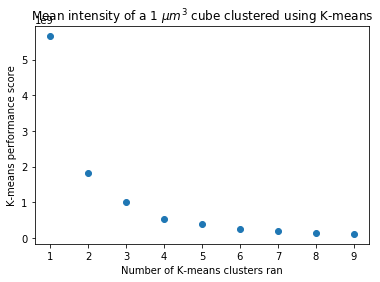

In [15]:
plt.scatter(klist,slist);## to see how many clusters work
plt.xlabel('Number of K-means clusters ran')
plt.ylabel('K-means performance score')

plt.title('Mean intensity of a 1 ${\mu}m^3$ cube clustered using K-means')
plt.show()

In [17]:
## want labels from running K-means for 2 clusters, so run kmeans for 2 clusters again:

kmeans = KMeans(n_clusters=2,n_init=100,init='k-means++')
kmeans.fit(train_data)
C, L = kmeans.cluster_centers_, kmeans.labels_
print(L)## to see which class the data points belong to, heer we observe that synapses are class zero
print(L.shape)

[1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 

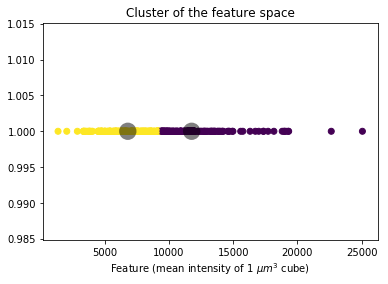

In [13]:
plt.scatter(train_data,len(train_data)*[1], c = L) ##to see which points belong to which clusters
plt.scatter(C,len(C)*[1],c = 'k',marker='o',s=300,alpha=0.5,edgecolor='none')
plt.xlabel('Feature (mean intensity of 1 ${\mu}m^3$ cube)')


plt.title('Cluster of the feature space')
plt.show()